# Extended Data Figure 6: Persistence across dimensions

#### import plot and data loading dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from persim import plot_diagrams

In [2]:
data = pd.read_hdf("../data/EDFigure6.h5")

### CEBRA rat dataset toplogy analysis

For each dimension of CEBRA-Behavior embedding from the rat hippocampus dataset, we obtained Betti number by applying persistent co-homology. The colored dots are lifespans observed in hypothesis based CEBRA-Behavior. To rule out noisy lifespans, we set a threshold (colored diagonal lines) as maximum lifespan based on 500 seeds of shuffled-CEBRA embedding for each dimension.
We obtained circular coordinate from the first cocycle from persistent co-homology analysis and map it to position.

In [3]:
def plot_barcode(topology_dgms, shuffled_max, ax, label_vis):
    plot_diagrams(
        topology_dgms,
        ax=ax,
        legend=False,
    )
    ax.plot(
        [
            -0.5,
            2,
        ],
        [-0.5 + shuffled_max[0], 2 + shuffled_max[0]],
        color="C0",
        linewidth=3,
        alpha=0.5,
    )
    ax.plot(
        [
            -0.5,
            2,
        ],
        [-0.5 + shuffled_max[1], 2 + shuffled_max[1]],
        color="orange",
        linewidth=3,
        alpha=0.5,
    )
    ax.plot(
        [-0.50, 2],
        [-0.5 + shuffled_max[2], 2 + shuffled_max[2]],
        color="green",
        linewidth=3,
        alpha=0.5,
    )
    ax.set_xlabel("Birth", fontsize=15)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels([0, 1, 2])
    ax.tick_params(labelsize=13)
    if label_vis:
        ax.set_ylabel("Death", fontsize=15)
    else:
        ax.set_ylabel("")


def plot_polar(radial_angle, label, ax, first, last):
    r = np.ones(1000)
    r_ind = label[:, 1] == 1
    l_ind = label[:, 2] == 1
    right = ax.scatter(
        radial_angle[r_ind], r[r_ind], s=5, c=label[r_ind, 0], cmap="cool"
    )
    left = ax.scatter(
        radial_angle[l_ind], r[l_ind], s=5, c=label[l_ind, 0], cmap="viridis"
    )
    ax.set_yticklabels([])
    ax.set_xticks(np.pi / 180.0 * np.linspace(0, 360, 8, endpoint=False))
    if first:
        ax.set_xticklabels(
            [
                "",
                "45$^\circ$",
                "90$^\circ$",
                "135$^\circ$",
                "180$^\circ$",
                "225$^\circ$",
                "270$^\circ$",
                "315$^\circ$",
            ]
        )
    if last:
        ax.set_xticklabels(
            [
                "0$^\circ$",
                "45$^\circ$",
                "90$^\circ$",
                "135$^\circ$",
                "",
                "225$^\circ$",
                "270$^\circ$",
                "315$^\circ$",
            ]
        )
    if not first and not last:
        ax.set_xticks(np.pi / 180.0 * np.linspace(0, 360, 9))
        ax.set_xticklabels(
            [
                "",
                "45$^\circ$",
                "90$^\circ$",
                "135$^\circ$",
                "",
                "225$^\circ$",
                "270$^\circ$",
                "315$^\circ$",
                "",
            ]
        )
    ax.tick_params(labelsize=11)
    return right, left


def plot_position_angle(radial_angle, position, ax, yax_label=False):
    r_ind = position[:, 1] == 1
    l_ind = position[:, 2] == 1

    def _to_deg(rad):
        return rad * 180 / np.pi

    ax.scatter(_to_deg(radial_angle[r_ind]), position[r_ind, 0] * 100, s=1, c="black")
    ax.scatter(_to_deg(radial_angle[l_ind]), position[l_ind, 0] * 100, s=1, c="gray")

    ax.set_xlabel("Radial angle [$^\circ$]", fontsize=15)
    if yax_label:
        ax.set_ylabel("Position [cm]", fontsize=15)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.tick_params(labelsize=13)
    ax.set_xticks([0, 90, 180, 270, 360])
    ax.set_xticklabels([0, 90, 180, 270, 360])


def display_labels_flag(i):
    if i == 0:
        first = True
        last = False
        label_vis = True
    elif i == 4:
        first = False
        last = True
        label_vis = False
    else:
        first = False
        last = False
        label_vis = False
    return first, last, label_vis

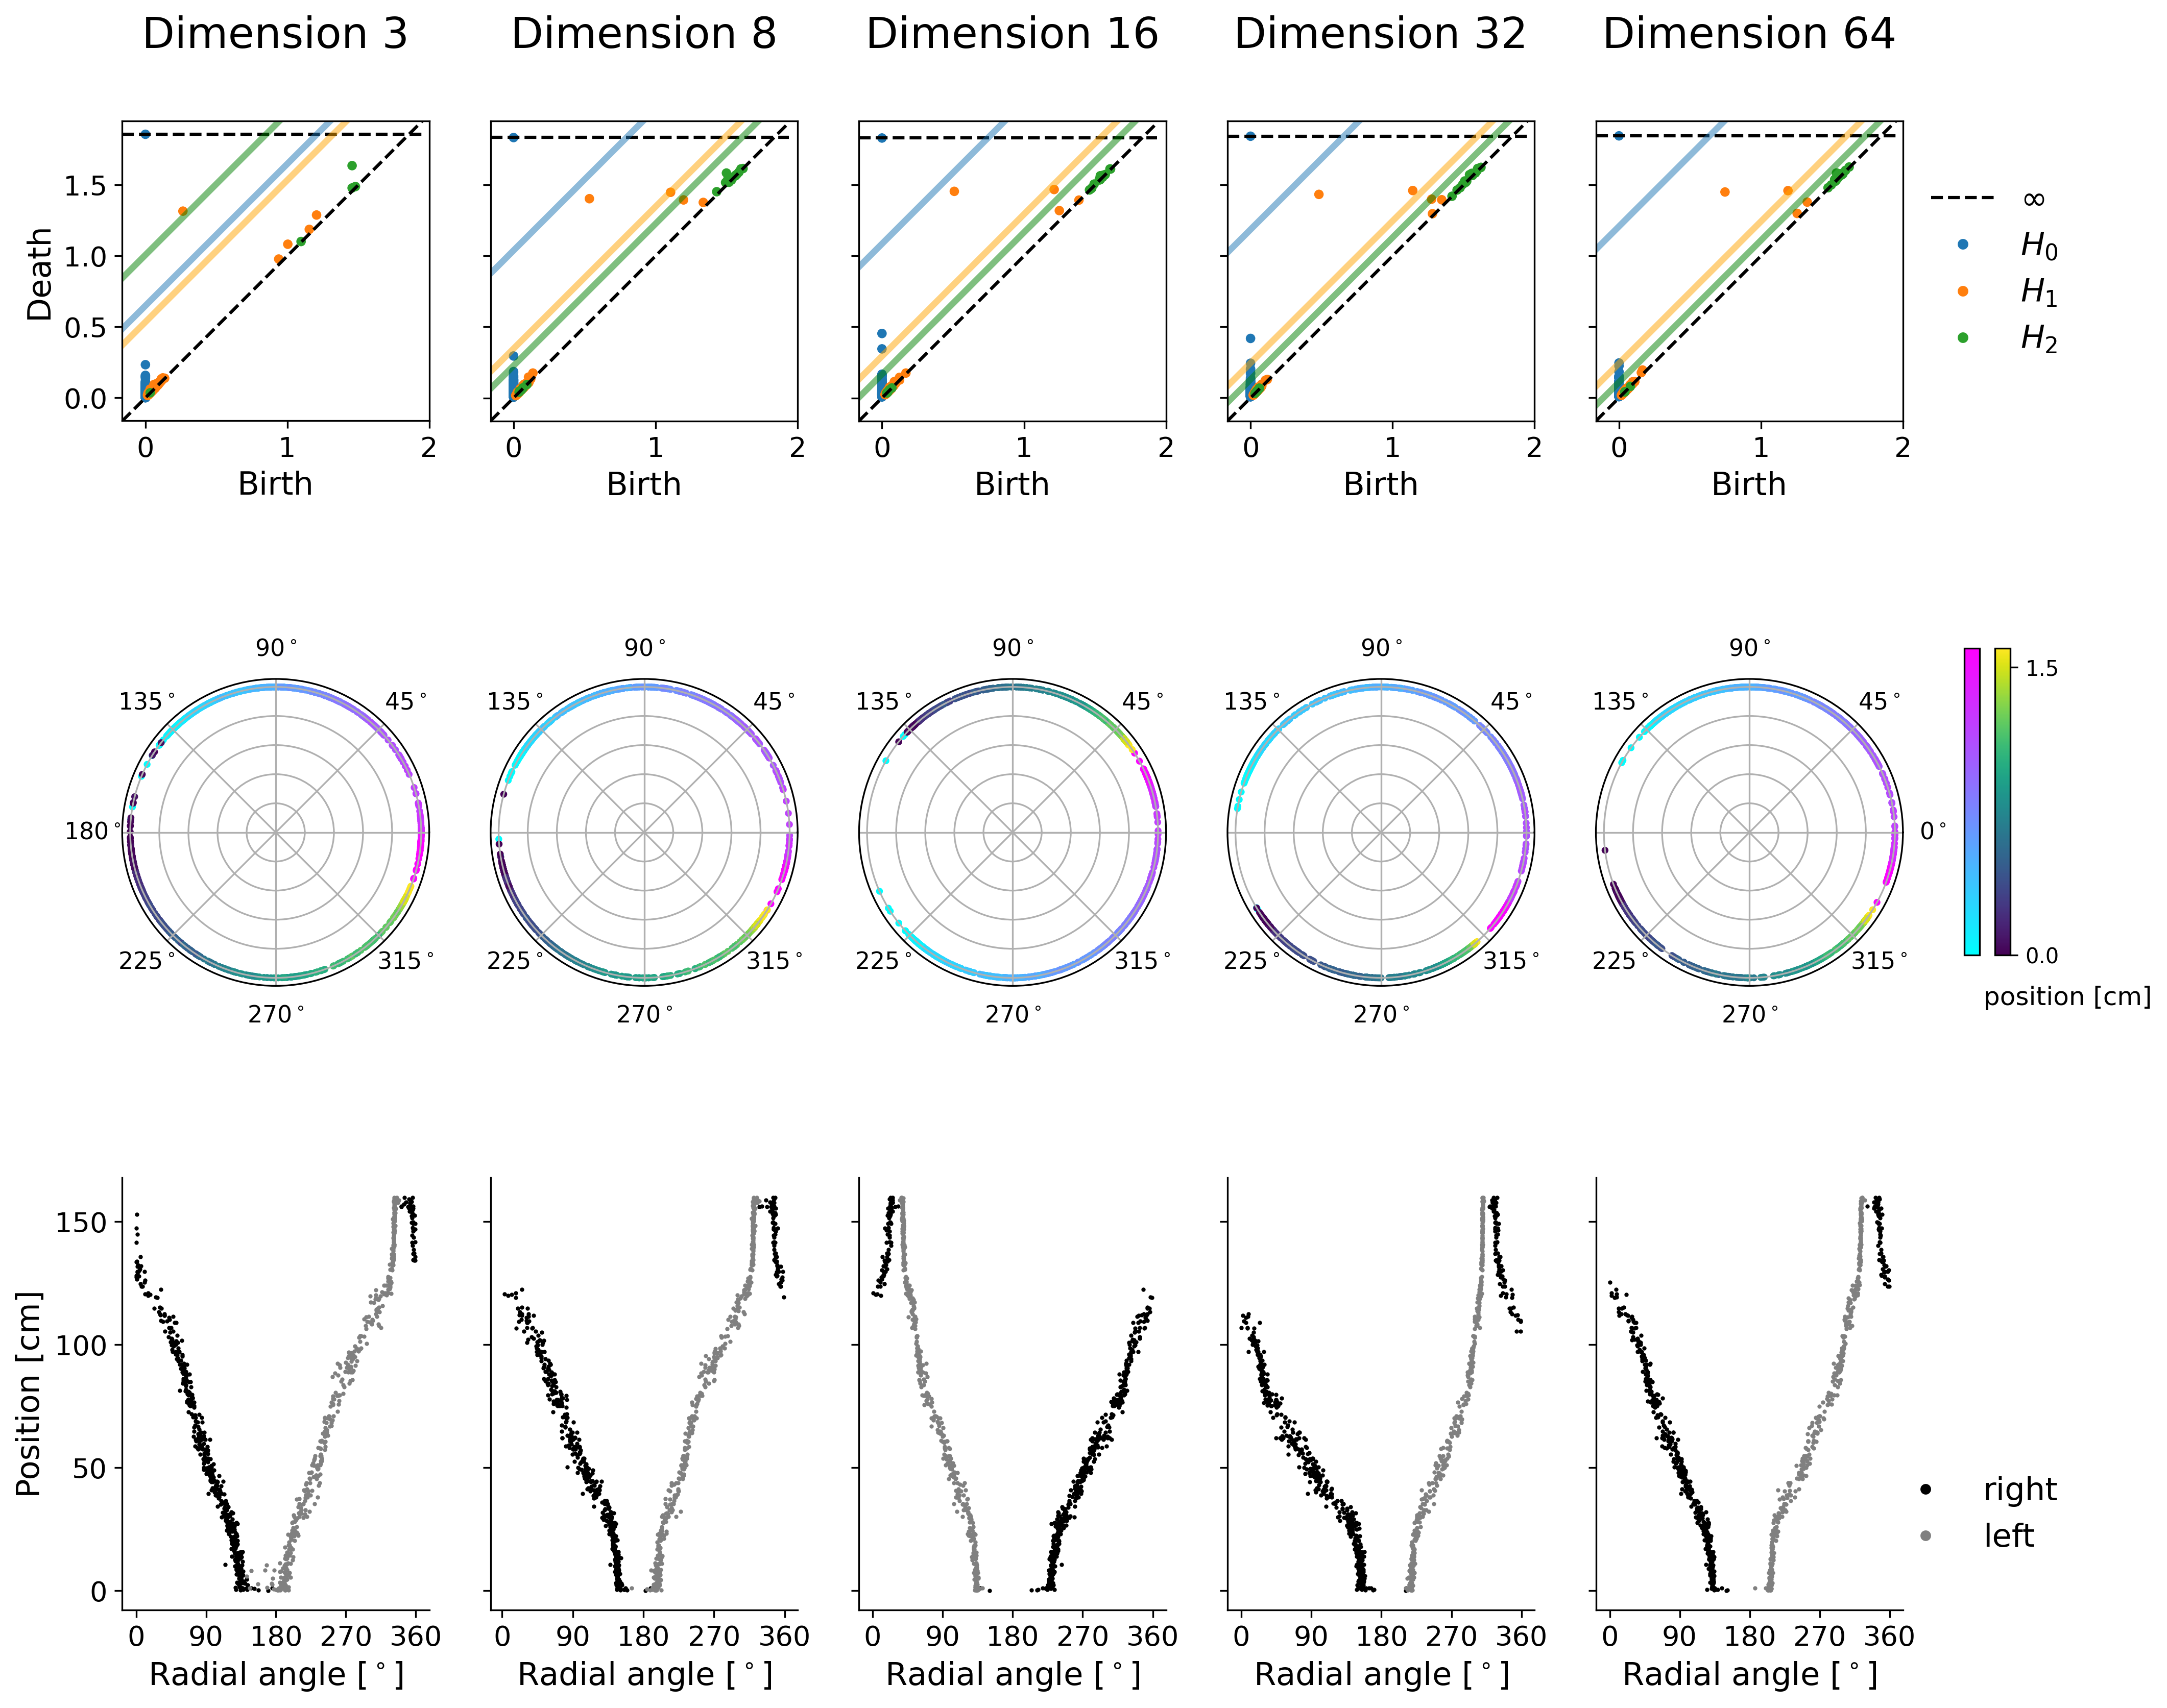

In [4]:
behavior_topology = data["behavior"]
max_dims_behavior = data["shuffled-max"]
circular_coord = data["circular_coord_analysis"]
dims = [3, 8, 16, 32, 64]
fig = plt.figure(figsize=(15, 11), dpi=300)
subfigs = fig.subfigures(
    3,
    1,
)
barcode_axs = subfigs[0].subplots(1, 5, sharey=True)
polar_axs = subfigs[1].subplots(1, 5, sharey=True, subplot_kw={"projection": "polar"})
position_axs = subfigs[2].subplots(1, 5, sharey=True)
for i, d in enumerate(dims):

    first, last, label_vis = display_labels_flag(i)
    barcode_ax = barcode_axs[i]
    barcode_ax.set_title(f"Dimension {d}", fontsize=20, y=1.2)
    plot_barcode(
        behavior_topology[d]["dgms"], max_dims_behavior[d], barcode_ax, label_vis
    )
    polar_ax = polar_axs[i]
    right, left = plot_polar(
        circular_coord["circular_coord"][0][d],
        circular_coord["position"],
        polar_ax,
        first,
        last,
    )
    position_ax = position_axs[i]

    plot_position_angle(
        circular_coord["circular_coord"][0][d],
        circular_coord["position"],
        position_ax,
        label_vis,
    )

barcode_legend = [
    Line2D([0], [0], ls="--", color="k"),
    Line2D([0], [0], markerfacecolor="C0", marker="o", color="w", markersize=6),
    Line2D([0], [0], markerfacecolor="C1", marker="o", color="w", markersize=6),
    Line2D([0], [0], markerfacecolor="C2", marker="o", color="w", markersize=6),
]

position_legend = [
    Line2D([0], [0], markerfacecolor="black", marker="o", color="w", markersize=6),
    Line2D([0], [0], markerfacecolor="gray", marker="o", color="w", markersize=6),
]


subfigs[0].legend(
    barcode_legend,
    ["$\infty$", "$H_0$", "$H_1$", "$H_2$"],
    frameon=False,
    bbox_to_anchor=[0.98, 0.7],
    fontsize=15,
)
cax_r = polar_axs[-1].inset_axes([1.2, 0.1, 0.05, 1])
cax_l = polar_axs[-1].inset_axes([1.3, 0.1, 0.05, 1])
r_bar = subfigs[1].colorbar(right, ax=polar_axs, cax=cax_r)
l_bar = subfigs[1].colorbar(left, ax=polar_axs, cax=cax_l)
r_bar.set_ticks([])
l_bar.set_ticks([0, 1.5], fontsize=15)
l_bar.set_label("position [cm]", rotation=0, y=-0.1, fontsize=12)
subfigs[2].legend(
    position_legend,
    ["right", "left"],
    frameon=False,
    bbox_to_anchor=[0.98, 0.4],
    fontsize=15,
)